## Wine Dataset Analysis using K-means and PCA

### Objectives:
**This exercise will help you understand and implement K-means clustering and Principal
Component Analysis (PCA) using the wine dataset.**

# DATA PREPARATION


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#loading the dataset
wine=load_wine()

#Convert to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
#data = data.drop('target', axis = 1)


## DATA EXPLORATION

In [ ]:
#viewing the columns name in the dataset
#data = load_wine()
#df = pd.DataFrame(data=data.data, columns=data.feature_names)
#df.info()

In [3]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### 2.1 Balanced or imbalanced classes?

In [4]:
np.bincount(data["target"])

array([59, 71, 48])

In [7]:
#check the percentage representation of the classes
data.target.value_counts(normalize=True).round(3)

1.0    0.399
0.0    0.331
2.0    0.270
Name: target, dtype: float64

The prevailing class is 1 but,on the appearance, there are no problematic imbalances( If the classes were unbalanced we could have used the resampling module from Scikit-Learn in order to up-sample minority class and/or down-sample majority class)

### 2.2 Checking missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

<AxesSubplot:>

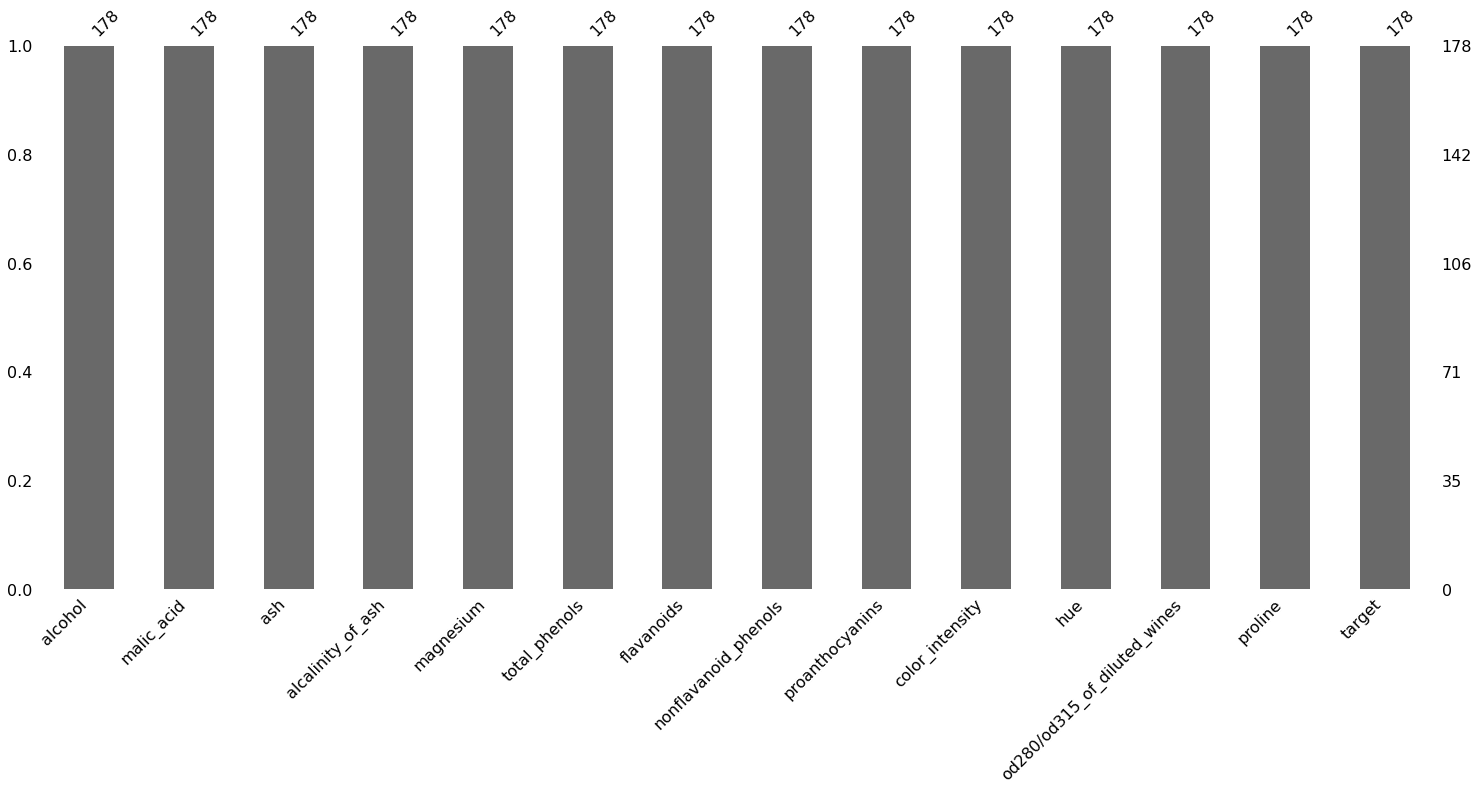

In [8]:
#check for null/missing values
data.info()
import missingno as msno
msno.bar(data)

### 2.3 Features correlation: is features selection or reduction necessary?

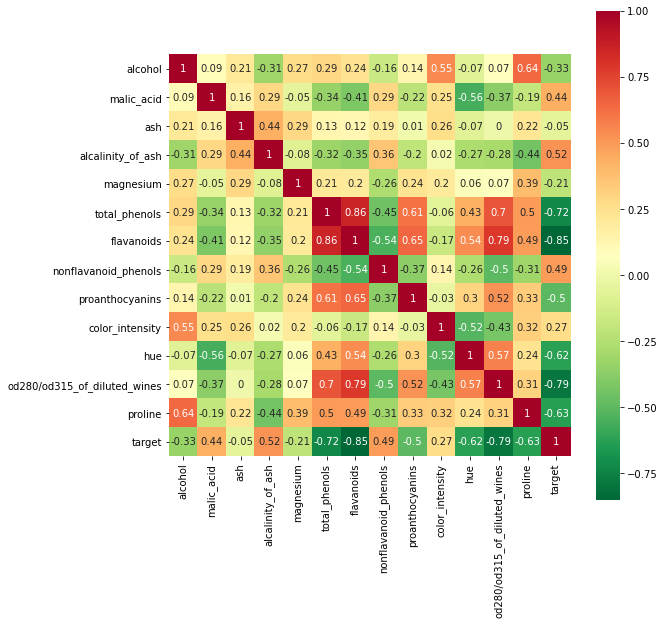

In [9]:
#Correlation Heatmap
correlation = data.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()

Some features have quite high linear correaltion:

* flavanoids / total phenols 0.86
* flavanoids / od280/od315_of_diluted_wines 0.79

For example, if features reduction is needed, I can keep only flavanoids and not use the other two. However, I'll come back to this only if needed.

To have a better sense of the correlations let's also pairplot

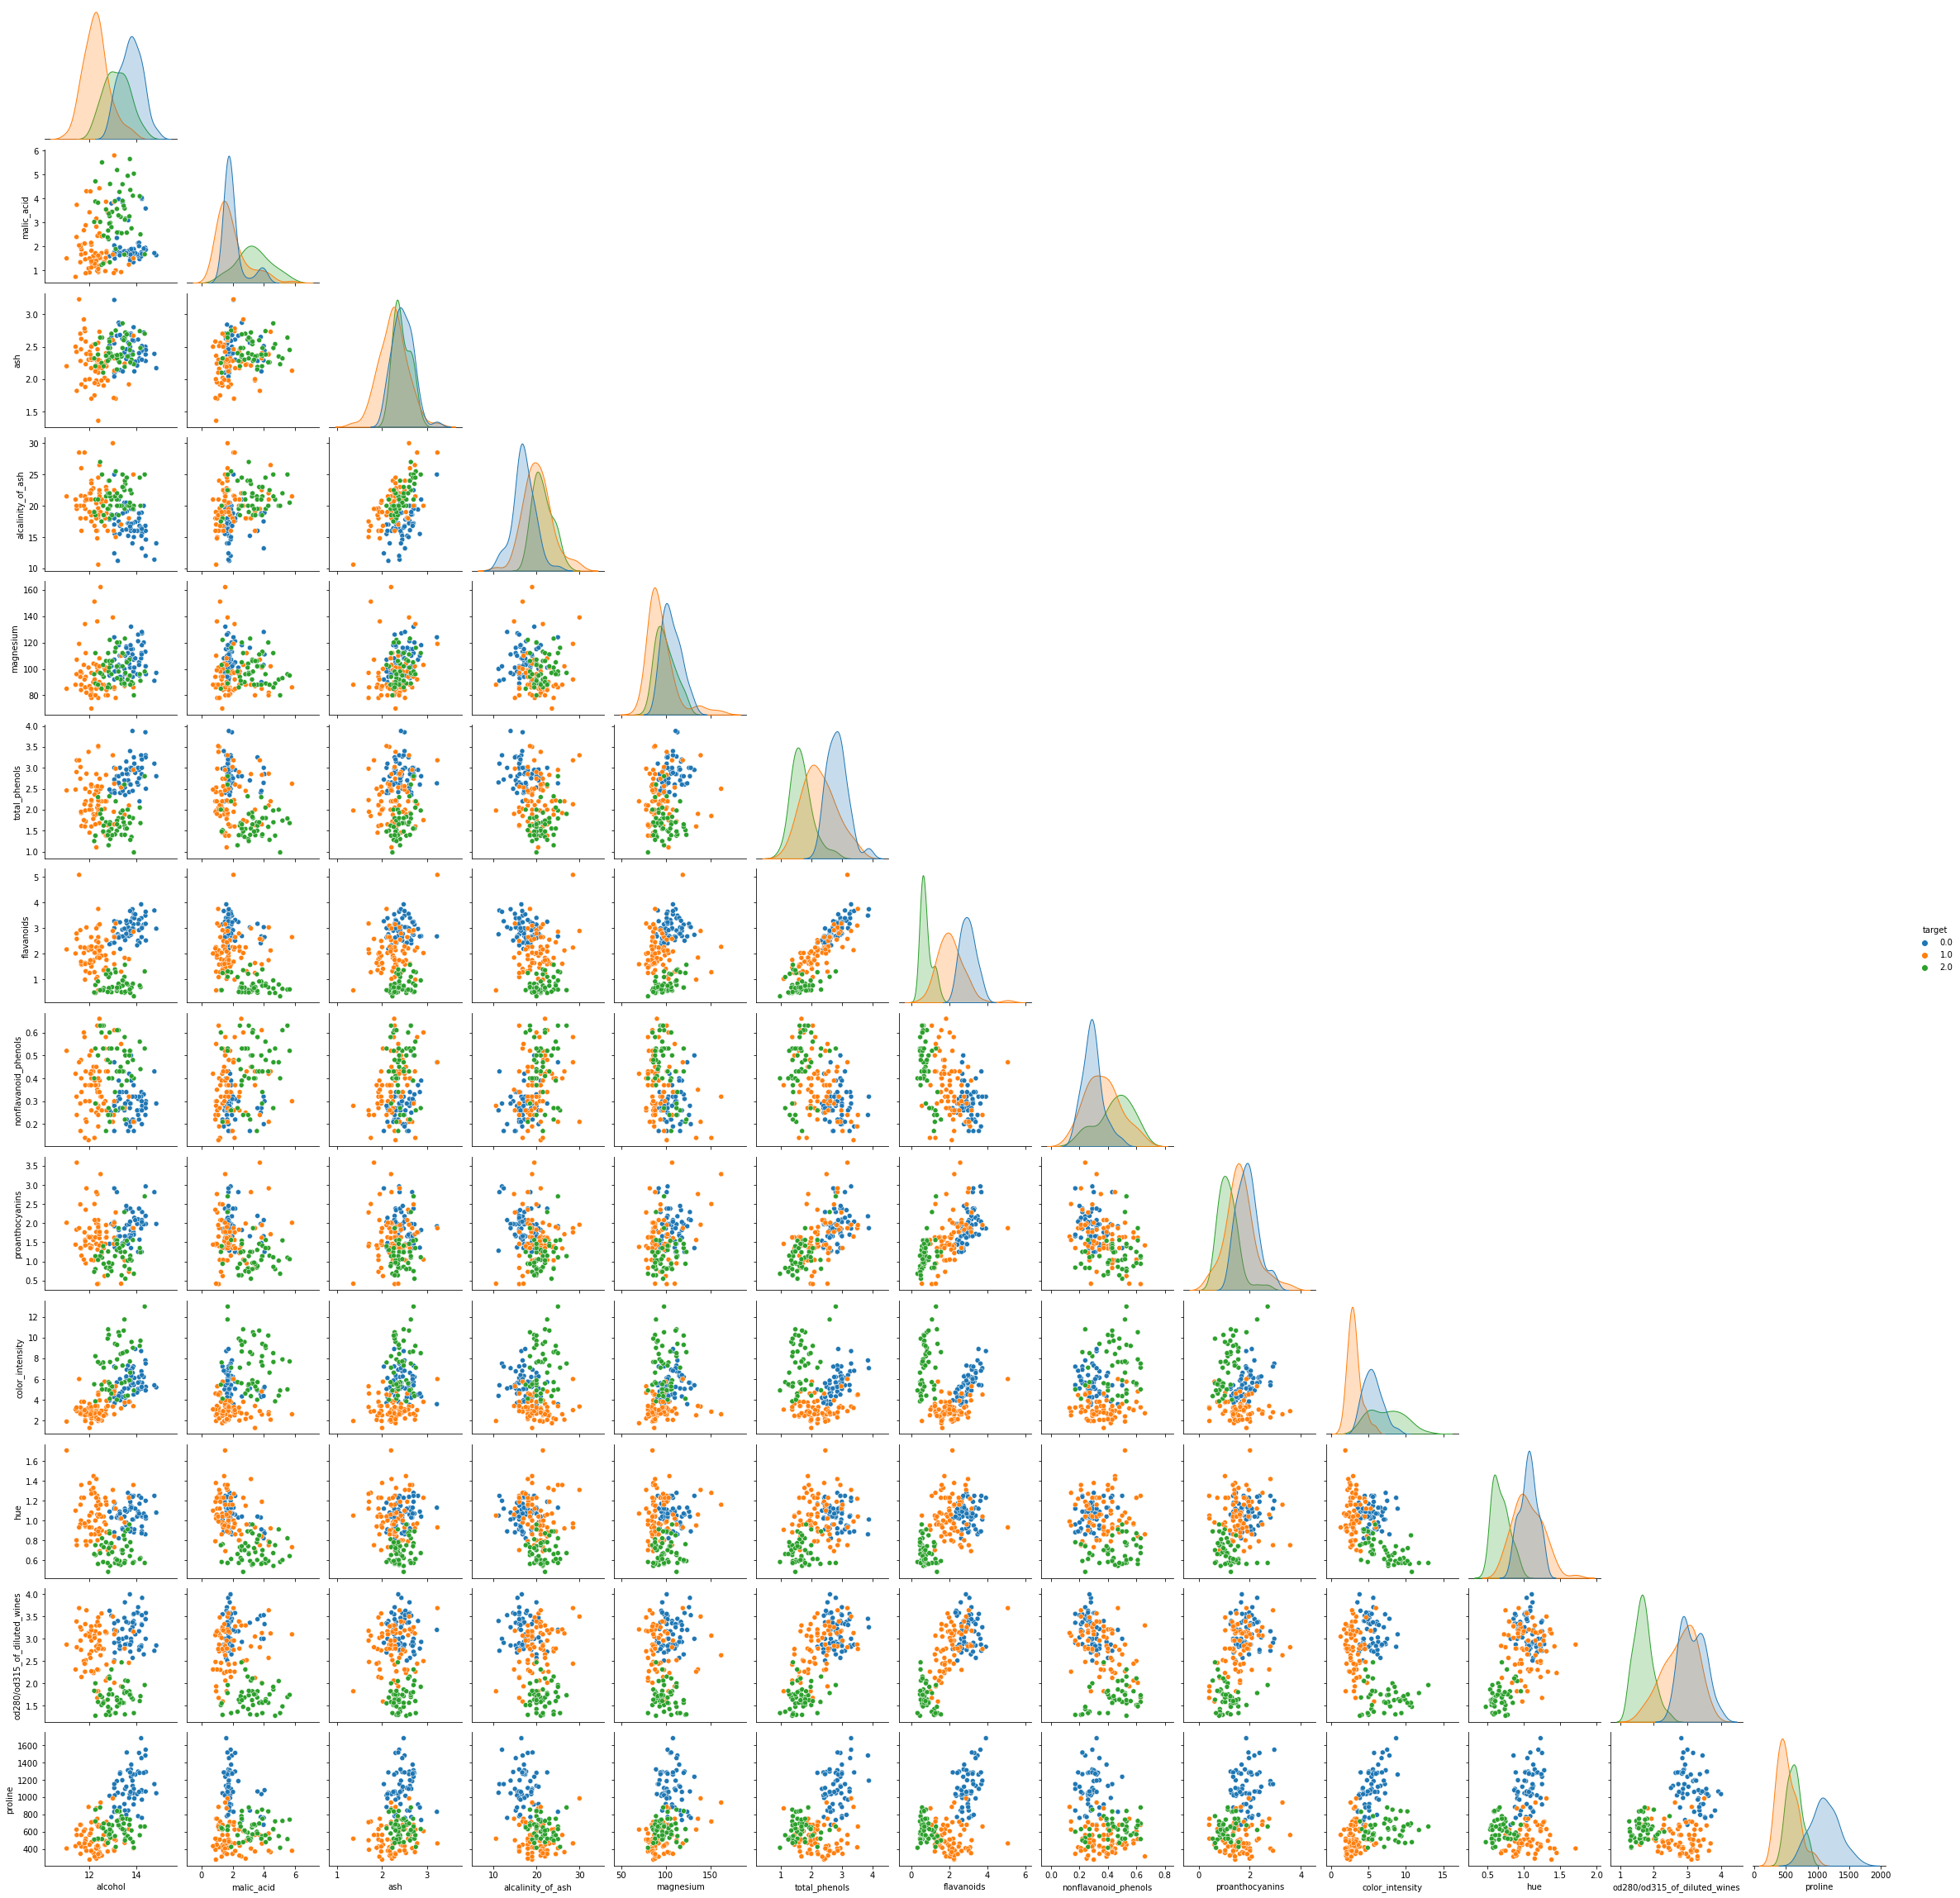

In [11]:
sns.pairplot(data, 
             hue='target', 
             palette="tab10", 
             corner=True)

plt.show()

I see that some features separate quite well the classes. For example, Proline seems to be a quite explicative variable itself, especially for wine 0 (blue dots). Also color intensity, coupled with total phenols or flavanoids separates quite well the classes.

I could eventually apply dimensionality reduction( for example with PCA we could reduce feature minimizing the loss of information).

## DATA PREPROCESSING

In [13]:
#Standardize the data to have a mean of 0 and variance of 1
data = StandardScaler().fit_transform(data)

data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [15]:
#create a PCA instance
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)


In [16]:
#Create a dataframe for PCA
X = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


In [18]:
X.head()

,principal component 1,principal component 2
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773


## Apply K-means

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [20]:
#Adding the K-means clustering labels to our DataFrame.
X['labels'] = kmeans.labels_


In [21]:
X.tail()

,principal component 1,principal component 2,labels
173,3.627996,-2.206617,2
174,2.942729,-1.752263,2
175,3.027272,-2.756040,2
176,2.755222,-2.293784,2
177,3.496336,-2.760608,2


## VISUALISE CLUSTERS

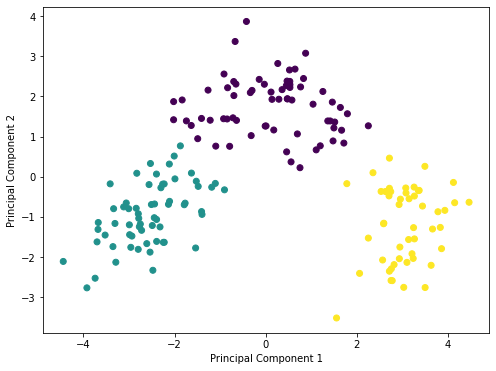

In [22]:
#creating a scatter plot of the two principal components  to the K-Means cluster assignments.

plt.figure(figsize=(8,6))
plt.scatter(X['principal component 1'], X['principal component 2'], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



### Determine optimal number of clusters using the elbow method

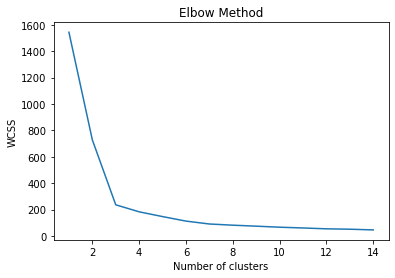

In [26]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Here we're using the elbow method to determine the optimal number of clusters.
# We run a loop to fit multiple k-means models and in each successive model,
# we increase the number of clusters. We record the sum of squared distances (WCSS) and plot it to observe 'The elbow'.

## Inertia decreases from 3 to 4 very slowly , so 3 was a good choice. 4 or 5 works fine too